In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\Arjun\Downloads\full_data.csv")

In [4]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [5]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

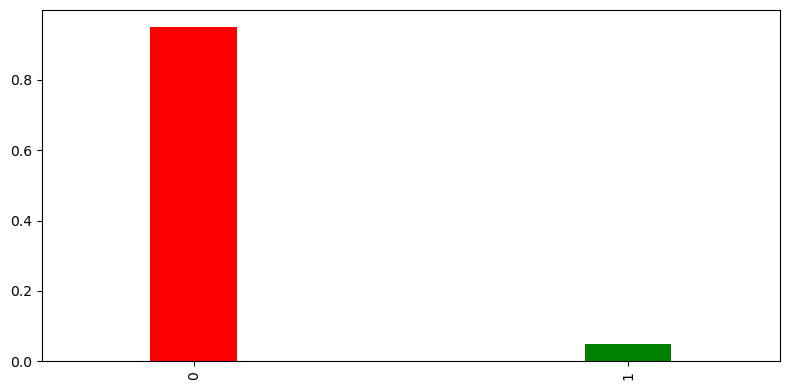

In [6]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [8]:
X = pd.DataFrame(df.iloc[:, 0:10].values)
Y = df.iloc[:, 10].values

In [9]:
print(X.shape, Y.shape)

(4981, 10) (4981,)


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X.loc[:,0] = labelencoder_X_2.fit_transform(X.iloc[:, 0])
X.loc[:,4] = labelencoder_X_2.fit_transform(X.iloc[:, 4])
X.loc[:,5] = labelencoder_X_2.fit_transform(X.iloc[:, 5])
X.loc[:,6] = labelencoder_X_2.fit_transform(X.iloc[:, 6])
X.loc[:,9] = labelencoder_X_2.fit_transform(X.iloc[:, 9])

In [11]:
X

,0,1,2,3,4,5,6,7,8,9
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1
4977,1,40.0,0,0,1,1,1,191.15,31.1,3
4978,0,45.0,1,0,1,0,0,95.02,31.8,3
4979,1,40.0,0,0,1,1,0,83.94,30.0,3


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

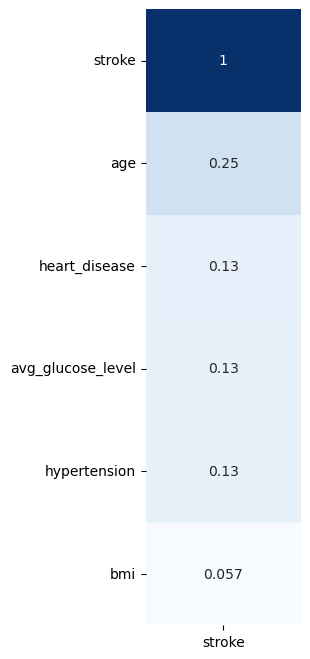

In [13]:
corr = df.corr()['stroke'].sort_values(ascending = False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr,cmap='Blues',cbar=False, annot = True)
plt.show()

In [14]:
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

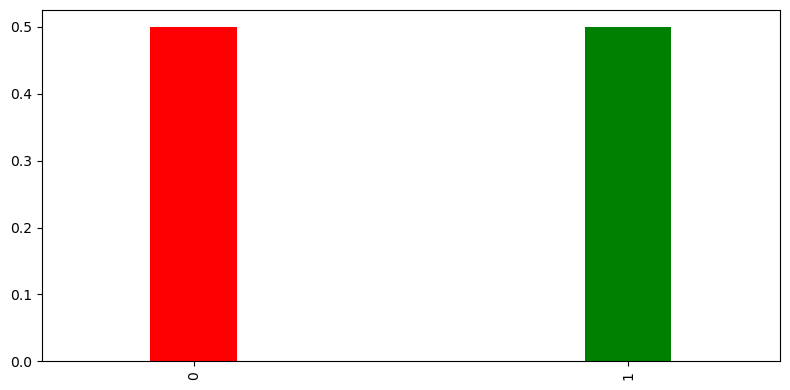

In [19]:
yy = pd.DataFrame(y_train_res)
fig, axes = plt.subplots(figsize=(8, 4))
yy[0].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks,optimizers

In [29]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

In [32]:
save_ck = callbacks.ModelCheckpoint('model_weights.h5',save_best_only=True,monitor='val_loss',mode='min')

In [33]:
losses = model.fit(X_train_res, y_train_res, batch_size = 10,callbacks = [save_ck], epochs = 200, validation_split = 0.2)

Epoch 1/200
319/319 [==============================] - 3s 5ms/step - loss: 0.1855 - accuracy: 0.9507 - auc: 0.7435 - val_loss: 0.1586 - val_accuracy: 0.9536 - val_auc: 0.8082
Epoch 2/200
319/319 [==============================] - 1s 4ms/step - loss: 0.1591 - accuracy: 0.9507 - auc: 0.8368 - val_loss: 0.1590 - val_accuracy: 0.9536 - val_auc: 0.8187
Epoch 3/200
319/319 [==============================] - 1s 3ms/step - loss: 0.1564 - accuracy: 0.9507 - auc: 0.8418 - val_loss: 0.1552 - val_accuracy: 0.9536 - val_auc: 0.8258
Epoch 4/200
319/319 [==============================] - 2s 7ms/step - loss: 0.1529 - accuracy: 0.9507 - auc: 0.8524 - val_loss: 0.1593 - val_accuracy: 0.9536 - val_auc: 0.8134
Epoch 5/200
319/319 [==============================] - 1s 3ms/step - loss: 0.1512 - accuracy: 0.9507 - auc: 0.8574 - val_loss: 0.1570 - val_accuracy: 0.9536 - val_auc: 0.8260
Epoch 6/200
319/319 [==============================] - 2s 5ms/step - loss: 0.1488 - accuracy: 0.9507 - auc: 0.8643 - val_loss

319/319 [==============================] - 1s 4ms/step - loss: 0.1018 - accuracy: 0.9630 - auc: 0.9485 - val_loss: 0.1957 - val_accuracy: 0.9486 - val_auc: 0.7469
Epoch 48/200
319/319 [==============================] - 1s 4ms/step - loss: 0.1017 - accuracy: 0.9611 - auc: 0.9493 - val_loss: 0.1872 - val_accuracy: 0.9460 - val_auc: 0.7648
Epoch 49/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9627 - auc: 0.9541 - val_loss: 0.1972 - val_accuracy: 0.9398 - val_auc: 0.7559
Epoch 50/200
319/319 [==============================] - 1s 3ms/step - loss: 0.1014 - accuracy: 0.9589 - auc: 0.9528 - val_loss: 0.1947 - val_accuracy: 0.9460 - val_auc: 0.7490
Epoch 51/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9636 - auc: 0.9555 - val_loss: 0.1993 - val_accuracy: 0.9473 - val_auc: 0.7272
Epoch 52/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9623 - auc: 0.9538 - val_loss: 0.195

319/319 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.9790 - auc: 0.9884 - val_loss: 0.2943 - val_accuracy: 0.9511 - val_auc: 0.6528
Epoch 94/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9777 - auc: 0.9869 - val_loss: 0.2888 - val_accuracy: 0.9385 - val_auc: 0.6684
Epoch 95/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9768 - auc: 0.9878 - val_loss: 0.2758 - val_accuracy: 0.9423 - val_auc: 0.6713
Epoch 96/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9796 - auc: 0.9898 - val_loss: 0.2904 - val_accuracy: 0.9360 - val_auc: 0.6868
Epoch 97/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9783 - auc: 0.9894 - val_loss: 0.2868 - val_accuracy: 0.9448 - val_auc: 0.6758
Epoch 98/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0555 - accuracy: 0.9796 - auc: 0.9889 - val_loss: 0.291

319/319 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9874 - auc: 0.9968 - val_loss: 0.4064 - val_accuracy: 0.9297 - val_auc: 0.6390
Epoch 140/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9890 - auc: 0.9973 - val_loss: 0.4168 - val_accuracy: 0.9435 - val_auc: 0.6155
Epoch 141/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9890 - auc: 0.9979 - val_loss: 0.4268 - val_accuracy: 0.9410 - val_auc: 0.5955
Epoch 142/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9881 - auc: 0.9971 - val_loss: 0.4216 - val_accuracy: 0.9410 - val_auc: 0.6228
Epoch 143/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9903 - auc: 0.9968 - val_loss: 0.4324 - val_accuracy: 0.9385 - val_auc: 0.6020
Epoch 144/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9893 - auc: 0.9963 - val_loss: 

319/319 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9915 - auc: 0.9989 - val_loss: 0.5310 - val_accuracy: 0.9398 - val_auc: 0.6083
Epoch 186/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0196 - accuracy: 0.9934 - auc: 0.9990 - val_loss: 0.5438 - val_accuracy: 0.9297 - val_auc: 0.5902
Epoch 187/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9928 - auc: 0.9988 - val_loss: 0.5689 - val_accuracy: 0.9473 - val_auc: 0.6093
Epoch 188/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0203 - accuracy: 0.9922 - auc: 0.9990 - val_loss: 0.5493 - val_accuracy: 0.9360 - val_auc: 0.6041
Epoch 189/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9903 - auc: 0.9978 - val_loss: 0.5685 - val_accuracy: 0.9410 - val_auc: 0.5972
Epoch 190/200
319/319 [==============================] - 1s 3ms/step - loss: 0.0208 - accuracy: 0.9922 - auc: 0.9989 - val_loss: 

In [54]:
y_pred = model.predict(X_test_res)
y_pred = (y_pred > 0.5)
T_count=0
F_count=0
c=np.empty(len(y_pred),dtype=object)
for index in range(len(y_pred)):
    if(y_pred[index][0]==y_test[index]):
        c[index]=True
        T_count=T_count+1
    else:
        c[index]=False
        F_count=F_count+1
print(T_count)
print(F_count)

32/32 [==============================] - 0s 2ms/step
915
82


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[911  32]
 [ 50   4]]


0.917753259779338

<AxesSubplot:>

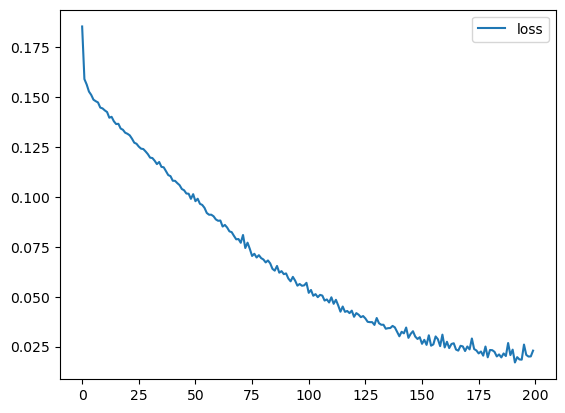

In [56]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss']].plot()

<AxesSubplot:>

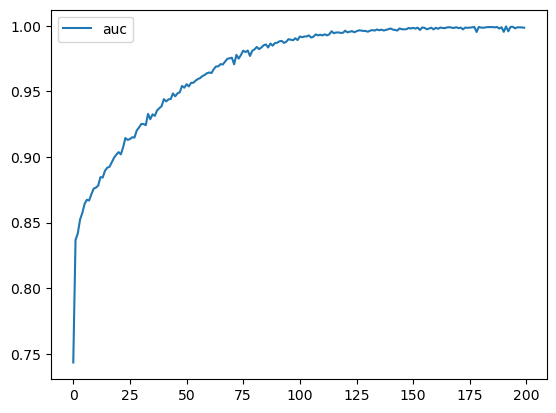

In [57]:
au_df = pd.DataFrame(losses.history)
au_df.loc[:,['auc']].plot()

<AxesSubplot:>

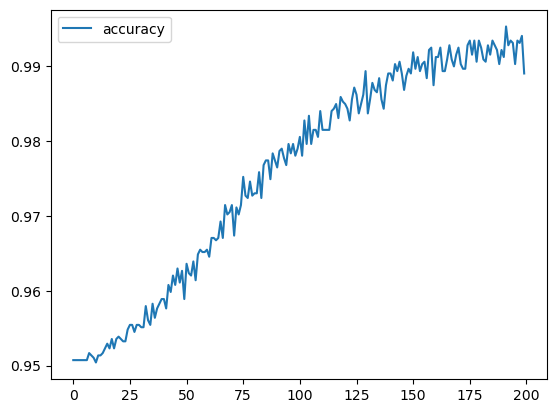

In [58]:
acc_df = pd.DataFrame(losses.history)
acc_df.loc[:,['accuracy']].plot()

<AxesSubplot:>

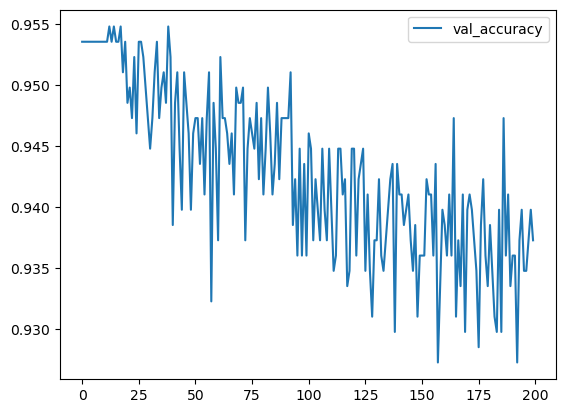

In [59]:
val_acc = pd.DataFrame(losses.history)
val_acc.loc[:,['val_accuracy']].plot()

<AxesSubplot:>

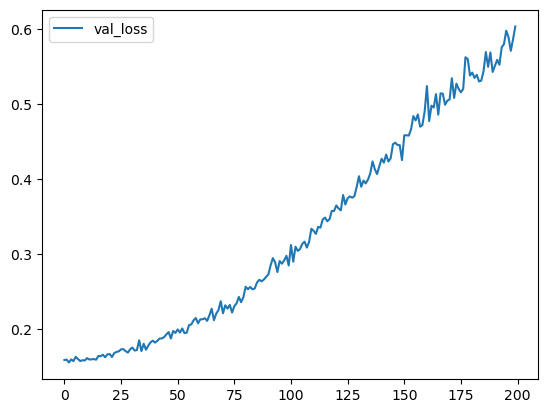

In [60]:
val_l = pd.DataFrame(losses.history)
val_l.loc[:,['val_loss']].plot()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       943
           1       0.11      0.07      0.09        54

    accuracy                           0.92       997
   macro avg       0.53      0.52      0.52       997
weighted avg       0.90      0.92      0.91       997

